# Final Project: Partial Least-Squares Regression in Python


In [1]:
from PIL import Image
from IPython.display import Image
import numpy as np
import numpy.linalg 
import re
import sys, os
import functools
import glob
numpy.set_printoptions(precision=3)

## Abstract 
 
The partial least-squares regression method (PLS) is a statistical approach to make a linear regression model by projecting the predicted variables and the observable variables to a new space. By combining features of principal component analysis and multiple regression, PLS is more robust than principal component regression and simple OLS regression when we need a large set of variables with a few samples. 

The paper “PARTIAL LEAST SQUARES REGRESSION: A TUTORIAL”[1] includes 4 parts: MLR,PCA,PCR and PLS. In our final project, we implement, test and optimize the four algorithms described in the paper. We make a comparison between the original model in the paper and other two kinds of PLS, followed by an analysis of optimization and several applications through both simlated and real world datasets.

## 1 Introduction  


### 1.1  Paper Background


This project aims at implementing and optimizing methods introduced by "PARTIAL LEAST-SQUARES REGRESSION: A TUTORIAL". As the partial least-squares regression method gainning more importance in various focuses of chemisty, its applications become increasingly beneficial for certain fields. Although a large amount of reasearch papers have targeted PLS as the developing direction, few of them successfully deliver the complete and comprehensive ideas behind PLS.

The paper "PARTIAL LEAST-SQUARES REGRESSION: A TUTORIAL" introduces PLS from a comprehensive vision and explains several key theories, such as multiple linear regression, principal component analysis and principal component regression for providing a decent tutorial of PLS. 


### 1.2 Literature review
The review paper "Overview and Recent Advances in Partial Least Squares"[2] by Roman Rosipal and Nicole Kramer, LNCS, 2006, provides additional information explaining different variants of PLS and introduces the general usage of PLS in data analysis. In addition, it concludes several well developed applications of PLS and related algorthims, serving as a general hand book of PLS applications. 

Another paper "Sparse Partial Least Squares Regression for Simulta- neous Dimension Reduction and Variable Selection"[3] by Hyonho Chun and Su ̈ndu ̈z Keles provides a decent introduction of biological applications of PLS algorithm with a detailed implementation to Sparse Partial Least Squares Regression. This paper inspires a pontential future develop direction of PLS and serves as a great introduction of PLS from another viewpoint. 

"Principle Component Analysis and Partial Least Squares: Two Dimension Reduction Techniques for Regression"[4] gives an innovative viewpoint of aplling both PCA and PLS as the main dimension reduction methdology in large-scaled data mining and predictive modeling fields. This paper also illustrates the performance comparison methdology between PCA and PLS methods, serving as a good reference for the optimizing method introduced in our project paper.



## 2.	Algorithm Description

This chapter introduces 4 different algorithms and related sample codes for comprehensive illustrations of their implementations. However, this section is focusing on demonstrating the detailed notations and introductions of Partial Least-Squares Regression, since it is the main algorithm of this paper.

### 2.1 Multiple Linear Regression (MLR)

The multiple linear regression (MLR) problems is the problem that features of $m$ independent variables $x$ are measured and fitted to a linaer relationship with one dependent variable $y$. If the equation gets $n$ samples, then $y$ can be written as a column vector, and $x$ can be represented by a $m$ x $n$ matrix.

There are three different cases of MLR:
* $m$ > $n$ : There are more variables than samples. As a result, the equation gets an infinite number of solutions for variable b. It is not wanted in any situation.
* $m$ = $n$ : There are equal number of variables and samples. Although this situation does not often encounted in practical world, it gives enough information for generating a unique solutino for b.
* $m$ < $n$ : There are more samples than variables. There is not an exact solution for b under this situation. However, a solution can be found by minimizing the length of the residual vector e. 


Despite three different cases of MLR regarding to independent variables, MLR also has the form with more than one dependent variable. It is important to note that this form can be easily generated by putting multiple dependent variable $y$ s into a matrix, since a general misconception states that MLR can only have one dependent variable.

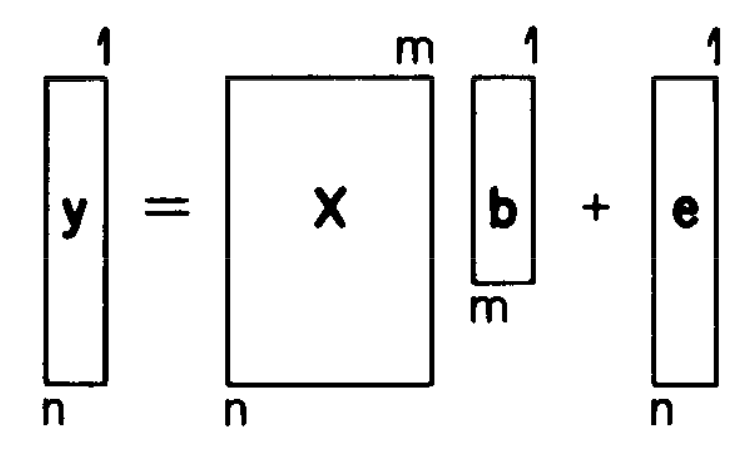

In [29]:
## A graphical representation of MLR algorithm.
Image(filename='pic1.png',width=300, height=300)

#### 2.1.1 MLR  code

A sample code indicates the algorithm of MLR and its potential application.

In [1]:
import numpy as np

x1 = np.array([1,2,3,4,5,6])
x2 = np.array([1,1.5,2,2.5,3.5,6])
x3 = np.array([6,5,4,3,2,1])
y = np.random.random(6)

nvar = 3
one = np.ones(x1.shape)
A = np.vstack((x1,one,x2,one,x3,one)).T.reshape(nvar,x1.shape[0],2)

for i,Ai in enumerate(A):
    a = np.linalg.lstsq(Ai,y)[0]
    R = np.sqrt( ((y - Ai.dot(a))**2).sum() )
    print (R)

0.691145850815
0.684178953844
0.678871322326


#### 2.1.2 MLR with Multicollinearity

As a regression with multiple variables, MLR always faces problems dealing with unacceptable large collinearity between variables. 

One way to solve this problem is to reduce the dimensionality N of the space of the predictor variables through the application of Principal Components Analysis (PCA). This method will be discussed in detail in the following chapter 2.2.

Another way is to convert the MLR to a two-step Principal Component Regression (PCR). This method will be introduced in chapter 2.3.

### 2.2 Principal Component Analysis (PCA)

Principal Component Analysis (PCA) can be described as a methodology of writing a matrix $X$ of rank $r$, which is the number demonstrating the true underlying dimensionality of $X$, as a sum of r matrices of rank 1. Moving one step forward, these rank 1 matrices can be written as outer products of two vectors, a score $t_h$ and a loading $p^{'}_h$. 

Nonlinear iterative partial least squares (NIPALS) is the main algorithm calculating the values of principal components. However, it can not perform all calculations at once. The general algorithm is to calculate $t_1$ and $p^{'}_1$ from $X$ matrix, subtract $t_1$$p^{'}_1$ from $X$, calculate residual, and use residual to find out $t_2$ and $p^{'}_2$.

The detailed NIPALS algorithm is as follows:

1. Take a vector $x_j$ from $X$ and call it $t_h$:$t_h$=$x_j$
2. Calculate $P^{'}_h$:$P^{'}_h$=$t^{'}_h$$X$/$t^{'}_h$$t_h$
3. Normalize $P^{'}_h$ to length 1:$P^{'}_{h new}$=$P^{'}_{h old}$ / ||$P^{'}_{h old}$||
4. Calculate $t_h$:$t_h$=$X$$P_h$ / $P^{'}_h$$P_h$
5. Compare the $t_h$ used in step 2 with that resulted in step 4. If they are the same, stop, since the iteration has converged. If they are still different, continuce running step 2.


PCA focuses solely on the space defined by the predictor variables and gives you a small orthogonal set of directions in that space that explain the most significant variations in just the space defined by $x$$1$, $x$$2$, ...., $x$$N$.Subsequently, you can use the principal directions (these will be linear combinations of the original predictor variables) for making predictions.  

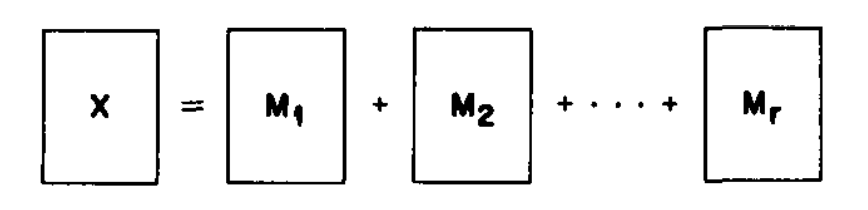

In [31]:
## A graphical representation of PCA algorithm.
Image(filename='pic2.png',width=400, height=400)

#### 2.2.1  PCA code

In [1]:
## create two 3x20 datasets 
np.random.seed(123) # random seed for consistency
 
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [2]:
## Using the whole dataset without class labels
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [3]:
## d-dimensional mean vector
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.57786468]
 [ 0.34875596]
 [ 0.52071362]]


In [4]:
## Computing the Scatter Matrix
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1)\
         - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)  

Scatter Matrix:
 [[ 52.61055245  15.06845363   4.07624697]
 [ 15.06845363  45.56755824   0.92729735]
 [  4.07624697   0.92729735  67.84643492]]


In [5]:
## Computing the Covariance Matrix which is an alternative expression of to the scatter matrix
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.34898852  0.38637061  0.10451915]
 [ 0.38637061  1.16839893  0.02377686]
 [ 0.10451915  0.02377686  1.73965218]]


In [6]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)
 
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
 
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'
 
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.62563478]
 [-0.77829547]
 [-0.05326609]]
Eigenvalue 1 from scatter matrix: 33.51820750301696
Eigenvalue 1 from covariance matrix: 0.8594412180260762
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[-0.63625553]
 [-0.54857976]
 [ 0.54243815]]
Eigenvalue 2 from scatter matrix: 62.12738429750416
Eigenvalue 2 from covariance matrix: 1.5930098537821578
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[ 0.45139786]
 [ 0.30547733]
 [ 0.83840538]]
Eigenvalue 3 from scatter matrix: 70.37895381131396
Eigenvalue 3 from covariance matrix: 1.8045885592644608
Scaling factor:  39.0
----------------------------------------


In [7]:
## Checking the eigenvector-eigenvalue calculation
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv, 
                                         decimal=6, err_msg='', verbose=True)

### 2.3 Principal Component Regression (PCR)
There exists a close link between Principal Component Regression (PCR) and Principla Component Analysis (PCA). In general, the principal component transformation of a data matrix $X$ can be viewed as a representation of $X$ as its scores matrix $T$.

$T$ = $X$$P$ (= $T$$P^{'}$$P$ = $T$$I_n$)  

then, the MLR formula can be written as:

$Y$ = $T$$B$ + $E$

One advantage of applying PCR is that it can solve collinearity problem by adding an invertible matrix in the calculation of $B$ hat. Another advantage is that, PCR can perform certain level noise reduction by eliminating the lesser principal components. However, PCR may wipe out some useful information while include noise due to its two-stage methodology. 



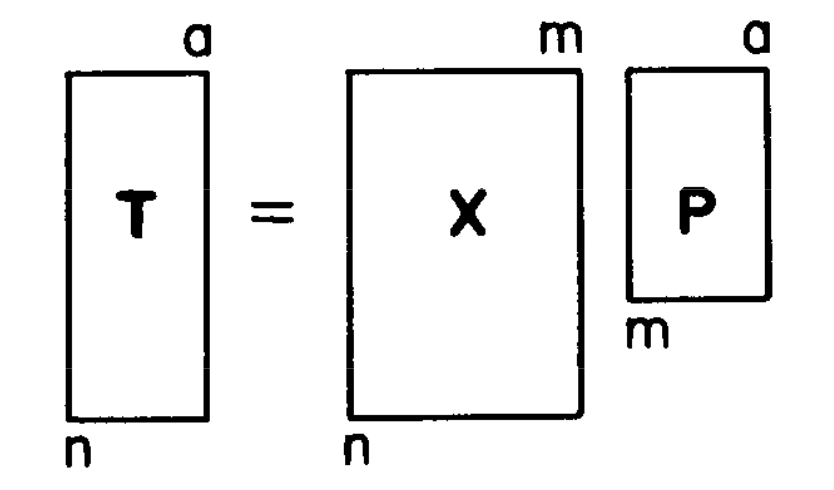

In [32]:
## A graphical representation of PCR transformation.
Image(filename='pic3.png',width=300, height=300)

#### 2.2.1  PCR code

In [8]:
## Principal Component Regression Example
## Try out partial correlation for dropping (or adding) factors (variable importance)
## Apply algorithm for partial least squares as an alternative to PCR 
from numpy.testing import assert_array_almost_equal
import statsmodels.api as sm
from statsmodels.sandbox.tools import pca
from statsmodels.sandbox.tools.cross_val import LeaveOneOut

nobs = 1000
f0 = np.c_[np.random.normal(size=(nobs,2)), np.ones((nobs,1))]
f2xcoef = np.c_[np.repeat(np.eye(2),2,0),np.arange(4)[::-1]].T
f2xcoef = np.array([[ 1.,  1.,  0.,  0.],
                    [ 0.,  0.,  1.,  1.],
                    [ 3.,  2.,  1.,  0.]])
f2xcoef = np.array([[ 0.1,  3.,  1.,    0.],
                    [ 0.,  0.,  1.5,   0.1],
                    [ 3.,  2.,  1.,    0.]])
x0 = np.dot(f0, f2xcoef)
x0 += 0.1*np.random.normal(size=x0.shape)
ytrue = np.dot(f0,[1., 1., 1.])
y0 = ytrue + 0.1*np.random.normal(size=ytrue.shape)

xred, fact, eva, eve  = pca(x0, keepdim=0)
print(eve)
print(fact[:5])
print(f0[:5])

[[-0.02996493  0.01657949  0.47144762 -0.88122889]
 [-0.91625175  0.39855097  0.00320356  0.04036806]
 [-0.39942215 -0.91429223 -0.05778477 -0.03453397]
 [-0.0068391  -0.07037022  0.87999307  0.46969507]]
[[-2.56867619 -1.84379912 -0.08842251 -0.14316232]
 [ 1.06347852  1.73614937  0.03640215 -0.00571607]
 [ 1.34018561  0.21983743 -0.2754377  -0.06737226]
 [-2.75758621 -0.78687507  0.09278904  0.07681938]
 [-0.06785456  1.00988657 -0.01006479 -0.00437881]]
[[ 0.57041486  1.33336693  1.        ]
 [-0.01685332 -1.26126422  1.        ]
 [-0.35731031 -0.24072366  1.        ]
 [ 0.77175347  0.79462462  1.        ]
 [ 0.15355514 -0.76336247  1.        ]]


In [10]:
import statsmodels.api as sm

res = sm.OLS(y0, sm.add_constant(x0, prepend=False)).fit()
print('OLS on original data')
print(res.params)
print(res.aic)
print(res.rsquared)

#print 'OLS on Factors'
#for k in range(x0.shape[1]):
#    xred, fact, eva, eve  = pca(x0, keepdim=k, normalize=1)
#    fact_wconst = sm.add_constant(fact)
#    res = sm.OLS(y0, fact_wconst).fit()
#    print 'k =', k
#    print res.params
#    print 'aic:  ', res.aic
#    print 'bic:  ', res.bic
#    print 'llf:  ', res.llf
#    print 'R2    ', res.rsquared
#    print 'R2 adj', res.rsquared_adj

print('OLS on Factors')
results = []
xred, fact, eva, eve  = pca(x0, keepdim=0, normalize=1)
for k in range(0, x0.shape[1]+1):
    #xred, fact, eva, eve  = pca(x0, keepdim=k, normalize=1)
    #As for the optimization purpose, this code faster and same result 
    fact_wconst = sm.add_constant(fact[:,:k], prepend=False)
    res = sm.OLS(y0, fact_wconst).fit()

    prederr2 = 0.
    for inidx, outidx in LeaveOneOut(len(y0)):
        resl1o = sm.OLS(y0[inidx], fact_wconst[inidx,:]).fit()
        #print data.endog[outidx], res.model.predict(data.exog[outidx,:]),
        prederr2 += (y0[outidx] - resl1o.predict(fact_wconst[outidx,:]))**2.
    results.append([k, res.aic, res.bic, res.rsquared_adj, prederr2])

results = np.array(results)
print(results)
print('best result for k, by AIC, BIC, R2_adj, L1O')
print(np.r_[(np.argmin(results[:,1:3],0), np.argmax(results[:,3],0),
             np.argmin(results[:,-1],0))])

OLS on original data
[-0.07001365  0.1139064   0.66138757  0.01597094  0.31570395]
-1338.95919821
0.992216422701
OLS on Factors
[[  0.00000000e+00   3.50878004e+03   3.51368780e+03   1.11022302e-16
    1.95600470e+03]
 [  1.00000000e+00   2.44054326e+03   2.45035877e+03   6.56729076e-01
    6.72063282e+02]
 [  2.00000000e+00  -1.33897450e+03  -1.32425124e+03   9.92169669e-01
    1.53480466e+01]
 [  3.00000000e+00  -1.33924906e+03  -1.31961804e+03   9.92179616e-01
    1.53433643e+01]
 [  4.00000000e+00  -1.33895920e+03  -1.31442042e+03   9.92185132e-01
    1.53531464e+01]]
best result for k, by AIC, BIC, R2_adj, L1O
[3 2 4 3]


In [ ]:
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt,
                        default_latex_fmt, default_html_fmt)

headers = 'k, AIC, BIC, R2_adj, L1O'.split(', ')
numformat = ['%6d'] + ['%10.3f']*4 #'%10.4f'
txt_fmt1 = dict(data_fmts = numformat)
tabl = SimpleTable(results, headers, None, txt_fmt=txt_fmt1)

print("PCA regression on simulated data,")
print("DGP: 2 factors and 4 explanatory variables")
print(tabl)
print("Notes: k is number of components of PCA,")
print("       constant is added additionally")
print("       k=0 means regression on constant only")
print("       L1O: sum of squared prediction errors for leave-one-out")

PCA regression on simulated data,
DGP: 2 factors and 4 explanatory variables
  k       AIC        BIC       R2_adj      L1O    
--------------------------------------------------
     0   3508.780   3513.688      0.000   1956.005
     1   2440.543   2450.359      0.657    672.063
     2  -1338.975  -1324.251      0.992     15.348
     3  -1339.249  -1319.618      0.992     15.343
     4  -1338.959  -1314.420      0.992     15.353
--------------------------------------------------
Notes: k is number of components of PCA,
       constant is added additionally
       k=0 means regression on constant only
       L1O: sum of squared prediction errors for leave-one-out


### 2.4 Partial Least-Squares Regression

#### What is differenct from methods above
* As PCA, partial least-squares regression also makes a pricipal componets analysis of the data by the predictor variables. 
* What is different from methods above: PLS consider the observed variations of the data defined by the predicted variables y1,y2,...,yM.
The variations of the data will be ignored by PLS while the PCA method cannot explain it.

#### 2.4.1 Model building

###### Notations[1]:

* X:
The matrix formed by the recorded values for the predictor variables x1, x2, ..., xN.  
Each row of X is one observation record and each column of X stands for one predictor variable.  

* Y:
The values for the predicted variables y1, y2, ..., yM are also placed in a matrix that is typically denoted Y.  
Each column of Y stands for one predicted variable and each row of Y for the values for all the predicted variables using the corresponding row of X for prediction.

* So if we have I observation records available to us, X is a matrix of size IxN and Y is a matrix of size IxM.

* Each principal component of X, usually referred to as a latent vector of X, is represented by t. 
The matrix whose columns are the latent vectors t is typically denoted T. 
If the p is the number of latent vectors discovered for X, then T is of size Ixp.  

* Along the same lines, each latent vector of Y is typically denoted u and the matrix formed by these latent vectors is denoted U. 
In most variants of the PLS algorithm, the latent vectors for X and Y are discovered conjointly.
In such cases, U will also be of size Ixp.


* Loadings: Each latent vector t is a weighted linear combination of the columns of X and each latent vector u is a weighted linear combination of the columns of Y.  The weights that go into these
    combinations can also be thought of as vectors. These weights are
    referred to as loadings.


* The loading vectors for X are represented
    by p and those for Y by q.  The matrix formed by the p vectors
    represented by P and by the q vectors by Q.


* Two more matrices important to the discovery of the latent vectors
    for X and Y are W and C.  As mentioned earlier, a latent vector t
    is merely a weighted linear combination of the columns of X. For a
    calculated t, we represent these weights in the form of a vector w,
    and all the w vectors (for the different t vectors) taken together
    constitute the matrix W.  



* By the same token, a latent vector u is
    is a weighted linear combination of the columns of Y and, for a
    given u, we represent these weights in the form of a vector c.  All
    the different vectors c (for the different u vectors) constitute
    the matrix C.


* A matrix of B: regression coefficients.  Once we have B, given a test data matrix Xtest, we can     make the prediction Ytest = (Xtest * B).  

#### 2.4.2 The mathematical foundation of the algorithms  

#### Main steps for PLS  algorithm.  

Goal: To find the latent vector t in the column space of X and the latent vector u in the column space of Y so that the covariance (t'*u)/I is maximized.  

* t' is the transpose of t;
* I is the number of rows in X (and in Y)

* Starting with a random guess for u, we iterate through the following eights steps until achieving the termination condition stated in the last step:

##### Step (1) w = X' * u

where X' is the transpose of X and u is the current value of the latent vector for Y.  
We use the elements of the vector w to obtain the weights for creating a linear combination of the columns of X as a new candidate for t.

##### Step (2)  w =  w / ||w||

where ||w|| is the norm of the vector w.  
That is, ||w|| = sqrt(w'* w).  We normalizes the magnitude of w to 1.

##### Step (3)  t = X * w

To obtain a new approximation to t. Normalize t as we normalized w in the previous step.

##### Step (4) c = Y' * t

Use the elements of the vector c thus obtaining the weights for creating a linear combination of the columns of Y for a new candidate as Y's latent vector u.

##### Step (5)  c = c / ||c||
Normalize c just as we normalized w.

##### Step (6)  u_old  =  u
Store away the currently used value for u

##### Step (7)  u = Y * c
Creat a new candidate for the latent vector for Y.

##### Step (8)  terminate the iterations if 

          ||u - u_old||<tol, where tol is a user-specified value.


##### Calculate p and q according to the obtained t and u

After we obtain a vector t from the column space of X and a vector u from the column space of Y, we need to figure out what weighted linear combination of the columns of X would result t and what weighted linear combination of the column vectors of Y would result  in Y.  Referring to these weights by the vectors p and q, we calculate

         p = (X'* t)/||t||

         q = (Y'* u)/||u||


* If this is our first pair (t,u) of latent vectors, we initialize the matrices T and U by setting them to the column vectors t and u,respectively.  

* If this is not the first pair (t,u), we augment T and U by the additional column vectors t and u, respectively.  The same goes for the vectors p and q vis-a-vis the matrices P and Q.


##### Deflation:
After we calculate of each pair (t,u) of latent vectors, it's
time to subtract out from X the contribution made to it by t, and
to subtract out from Y the contribution made to it by u. 
This step is called deflation. 

         X = X - (t*p')
         Y = Y - b*t*c', where b = t'*u.  

###### Calculate matrix B

Since we have already extracted the latent vectors of X and Y, the last step is to calculate the matrix B of regression coefficients:

 $B$ = $P^{-1}$ * diag[b1, b2, ...., bp]*C',
          
where $P^{-1}$ is the pseudo-inverse of the transpose of P. diag[b1, b2, ...., bp] is the diagonal matrix formed by the b values     computed after the calculation of each pair (t,u) as mentioned     earlier. C' is the transpose of the C matrix.


##### Predictions

After calcalating B matrix, we can make predictions now as new row vectors for the X matrix come along. 

We use Xhat to denote the new data consisting of the observed values for the predictor variables:

                      Yhat =  Xhat * B

#### 2.4.3 The Python code of PLS

Now we implement the PLS in python. The codes are as follows.

In [75]:
#function1 centralize the data

def centralize(X,Y):
    X=X-np.mean(X)
    Y=Y-np.mean(Y)
    return (X,Y)

In [76]:
#The main function PLS
def PLS_original(X,Y,tol=1e-6):
    N = X.shape[0]
    u = numpy.random.rand(1,N)
    u = numpy.asmatrix(u).T
  
    #initialize T，U,W,C
    T=U=W=C=None 
    #initialize P,Q,Bdiag
    P=Q=Bdiag=None

    i=0
    while(True):                             
        j = 0
        while (True):
            #Step(1)
            w = X.T * u   
            #Step(2) Normalizes the magnitude of w to 1.
            w = w / numpy.linalg.norm(w)
            #Step(3) a new approximation to t 
            t = X * w  
            t = t / numpy.linalg.norm(t) #Normalize t
            #Step(4) Obtain c
            c = Y.T * t
            #Step(5) Normalize c 
            c = c / numpy.linalg.norm(c)        
            #Step(6) Store the currently used value for u
            u_old = u
            #Step(7) A new candidate for the latent vector for Y. 
            u = Y * c
            #Step(8) Terminate the iterations if error is small enough
            error = numpy.linalg.norm(u - u_old)
            if error < tol:
                break
            j += 1 

        #Obtain matrix b
        b = t.T * u
        b = b[0,0]
        
        if T is None:
            T = t
        else:
            T = numpy.hstack((T,t))
        if U is None:
            U = u
        else:
            U = numpy.hstack((U,u))
        if W is None:
            W = w
        else:
            W = numpy.hstack((W,w))
        if C is None:
            C = c
        else:
            C = numpy.hstack((C,c))
     
        p = X.T * t / (np.linalg.norm(t) ** 2)
        q = Y.T * u / (np.linalg.norm(u) ** 2)

        if P is None:
            P = p
        else:
            P = numpy.hstack((P,p))
        if Q is None:
            Q = q
        else:
            Q = numpy.hstack((Q,q))
        if Bdiag is None:
            Bdiag = [b]
        else:
            Bdiag.append(b)
         
        X_old = X
        Y_old = Y
        X = X - t * p.T
        Y = Y - b * t * c.T
        i += 1

        if numpy.linalg.norm(X) < 0.001: break

        #Obtain B
        B = numpy.diag(Bdiag)
        B = numpy.asmatrix(B) 
        B = numpy.linalg.pinv(P.T) * B * C.T
        
        #Prediction based on the original X:     
        Y_predicted = centralize(X,Y)[0] * B
        print("\nY_predicted from the original X:")
        print(Y_predicted)

        Y_predicted_with_mean = Y_predicted + np.mean(Y)
        print("\nThe predicted Y with the original Y's column-wise mean added:")
        print(Y_predicted_with_mean)
         
        return B


In [77]:
# Testing by a small data set
X = np.array([[0., 0., 1.],[1.,0.,0.], [2.,2.,2.], [2.,5.,4.]])
Y = np.array([[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]])

#Testing
PLS_original(X,Y)


Y_predicted from the original X:
[[-0.124 -0.126]
 [-0.147 -0.15 ]
 [-0.143 -0.145]
 [-0.136 -0.139]]

The predicted Y with the original Y's column-wise mean added:
[[-0.297 -0.299]
 [-0.32  -0.322]
 [-0.315 -0.318]
 [-0.309 -0.311]]


matrix([[ 0.646,  0.656],
        [ 1.268,  1.288],
        [ 1.076,  1.093]])

## 3.	Optimization


### 3.1 The optimization of model

#### 3.1.1 The optimization of PLS by deflation

According to the methimatical model of PLS, the deflation calculation is:


         X = X - (t*p')
         Y = Y - b*t*c', where b = t'*u. 

If we change the calculation of deflation as:

         X = X - (t*p')
         Y = Y - (t*t'*Y)/||t||

This kind of calculation is to first respectively find the covariance maximizing latent vectors t and u from the column spaces of X and Y, and then deflates X and Y as shown. The progress will continue until there is not much left of the matrices X and Y. 

#### 3.1.2 The optimization of PLS by matrix B

According to the methimatical model of PLS, the calculation of matrix B is:

$B$ = $P^{-1}$ * Diag[b1, b2, ...., bp]* $C^{'}$

We change the calculation of matrix B as: 

$B$ = $W$* $(P'* W)^{-1}$ * $C^{'}$, 

where $(P'* W)^{-1}$ is the matrix inverse of the product of the two matrices P' and W.   
          
 

#### 3.1.3 The python code according to 3.1.1 and 3.1.2

#### 3.1.3.1 Optimization1:When Y matrix consists of one column
This method is based on the paper "Overview and Recent Advances in Partial Least Squares" by Roman Rosipal and Nicole Kramer, LNCS, 2006. 

In [78]:
#PLS_modified1()
from numpy.linalg import inv

def PLS_modified1(X,Y,tol=1e-6):
    if Y.shape[1] != 1:
        raise ValueError("Y should have only one column")
    X,Y=centralize(X,Y)

    T=U=W=C=P=Q=B=t=w=u=c=p=q=None        
    u = Y
    i = 0

    while (True):
        w = np.dot(X.T , u)
        w = w / numpy.linalg.norm(w)
        t = np.dot(X,w)
        c = np.dot(Y.T,t)
        c = c / numpy.linalg.norm(c)        
        u = np.dot(Y,c)

        if T is None:
            T = t
        else:
            T = numpy.hstack((T,t))

        if U is None:
            U = u
        else:
            U = numpy.hstack((U,u))

        if W is None:
            W = w
        else:
            W = numpy.hstack((W,w))

        p = np.dot(X.T,t/(numpy.linalg.norm(t)**2))
        q = np.dot(Y.T,u/(numpy.linalg.norm(u)**2))

        if P is None:
            P = p
        else:
            P = numpy.hstack((P,p))

        if Q is None:
            Q = q
        else:
            Q = numpy.hstack((Q,q))

        X_old = X
        Y_old = Y
        xdot=np.dot(t, p.T)
        t_tT=np.dot(t,t.T)
        t_tT_Y=np.dot(t_tT,Y)
        
        X = X - xdot  
        Y = Y - t_tT_Y/(np.linalg.norm(t)**2)

        i += 1
        if np.linalg.norm(X) < 0.001: break
        pprimew=np.dot(P.T,W)
        inv_pprimew=inv(pprimew)
         
        B1 = np.dot(W,inv_pprimew)
        B2 = np.dot(B1,T.T)
        B = np.dot(B2,Y)

        return B

In [79]:
# Data
X = np.array([[0., 0., 1.],[1.,0.,0.], [2.,2.,2.], [2.,5.,4.]])
Y0 = np.array([[0.1], [0.9], [6.2], [11.9]])
#Testing
PLS_modified1(X,Y0)

array([[ -2.331e-15],
       [ -6.883e-15],
       [ -4.996e-15]])

#### 3.1.3.2 Optimization2

In [80]:
def PLS_modified2(X,Y,tol=1e-6):
    X,Y=centralize(X,Y)
    N = X.shape[0]      
    u = numpy.random.rand(1,N)
    u = numpy.asmatrix(u).T
    
    T=U=W=C=P=Q=B=t=w=c=p=q=None  
    i = 0

    while(True):
        j = 0
        while (True):
            w = X.T * u
            w = w / numpy.linalg.norm(w)
            t = X * w
            c = Y.T * t
            c = c / numpy.linalg.norm(c)        
            u_old = u
            u = Y * c
            error = numpy.linalg.norm(u - u_old)
            if error <tol: 
                break
            j += 1  
  
        if T is None:
            T = t
        else:
            T = np.hstack((T,t))
        
        if U is None:
            U = u
        else:
            U = np.hstack((U,u))

        if W is None:
            W = w
        else:
            W = np.hstack((W,w))
         
        if C is None:
            C = c
        else:
            C = np.hstack((C,c))

        p = X.T * t / (numpy.linalg.norm(t) ** 2)
        q = Y.T * u / (numpy.linalg.norm(u) ** 2)

        if P is None:
            P = p
        else:
            P = numpy.hstack((P,p))

        if Q is None:
            Q = q
        else:
            Q = numpy.hstack((Q,q))

        X_old = X
        Y_old = Y
        X = X - t * p.T
        Y = Y - ( (t * t.T) * Y ) / (numpy.linalg.norm(t) ** 2)

        i += 1

        if numpy.linalg.norm(X) < 0.001: 
            break
        B = W * (P.T * W).I * C.T 

        return B

In [81]:
# Data
X = np.array([[0., 0., 1.],[1.,0.,0.], [2.,2.,2.], [2.,5.,4.]])
Y0 = np.array([[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]])

#Testing
PLS_modified2(X,Y0)

matrix([[ 0.189,  0.195],
        [ 0.551,  0.569],
        [ 0.38 ,  0.393]])

#### 3.1.4 The difference of three PLS types

* Difference1: Deflation is how we subtract the influence of t from X and the influence of u from Y before we search for the next new pair (t,u). The three PLS differs by deflation.

* Difference2: The three types differs by the normalization of the latent vectors.

* Difference3: The three types differs by the calculation of matirx B of the regression coefficients. 

* PLS_original( ) is based on the paper "Partial Least Squares Regression and Projection on
    Latent Structure Regression," by Herve Abdi; PLS_modified1( ) and PLS_modified2( ) are based on "Overview and Recent Advances in Partial Least Squares" by Roman Rosipal and Nicole Kramer, LNCS, 2006. 

### 3.2 The optimization of python code

We use JIT to optimize our python code.

### 3.2.1 The comparation of pls_original( )

In [54]:
import time

def timer(f, *args, **kwargs):
    start = time.clock()
    ans = f(*args, **kwargs)
    return ans, time.clock() - start

def report(fs, *args, **kwargs):
    ans, t = timer(fs[0], *args, **kwargs)
    for f in fs[1:]:
        ans_, t_ = timer(f, *args, **kwargs)
        print('%s: %.1f' % (f.__name__, t/t_))

In [55]:
%timeit -r3 -n3 PLS_original(X,Y)
pass

The slowest run took 15.53 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 959 µs per loop


In [56]:
import numba
from numba import jit

In [57]:
@jit
def PLS_original(X,Y,tol=1e-6):
    N = X.shape[0]
    u = numpy.random.rand(1,N)
    u = numpy.asmatrix(u).T
    
    #initialize T，U,W,C
    T=U=W=C=None 

    #initialize P,Q,Bdiag
    P=Q=Bdiag=None

    i=0
    while(True):                             
        j = 0
        while (True):
            #Step(1)
            w = X.T * u   
            #Step(2) Normalizes the magnitude of w to 1.
            w = w / numpy.linalg.norm(w)
            #Step(3) a new approximation to t 
            t = X * w  
            t = t / numpy.linalg.norm(t) #Normalize t
            #Step(4) Obtain c
            c = Y.T * t
            #Step(5) Normalize c 
            c = c / numpy.linalg.norm(c)        
            #Step(6) Store the currently used value for u
            u_old = u
            #Step(7) A new candidate for the latent vector for Y. 
            u = Y * c
            #Step(8) Terminate the iterations if error is small enough
            error = numpy.linalg.norm(u - u_old)
            if error < tol:
                break

            j += 1 

        #Obtain matrix b
        b = t.T * u
        b = b[0,0]
        
        if T is None:
            T = t
        else:
            T = numpy.hstack((T,t))
        if U is None:
            U = u
        else:
            U = numpy.hstack((U,u))
        if W is None:
            W = w
        else:
            W = numpy.hstack((W,w))
        if C is None:
            C = c
        else:
            C = numpy.hstack((C,c))
     
        p = X.T * t / (np.linalg.norm(t) ** 2)
        q = Y.T * u / (np.linalg.norm(u) ** 2)

        if P is None:
            P = p
        else:
            P = numpy.hstack((P,p))
        if Q is None:
            Q = q
        else:
            Q = numpy.hstack((Q,q))
        if Bdiag is None:
            Bdiag = [b]
        else:
            Bdiag.append(b)
         
        X_old = X
        Y_old = Y
        X = X - t * p.T
        Y = Y - b * t * c.T
        i += 1

        if numpy.linalg.norm(X) < 0.001: break

        #Obtain B
        B = numpy.diag(Bdiag)
        B = numpy.asmatrix(B) 
        B = numpy.linalg.pinv(P.T) * B * C.T
        
        #Prediction based on the original X:
        
        Y_predicted = centralize(X,Y)[0] * B
        #print("\nY_predicted from the original X:")
        #print(Y_predicted)

        Y_predicted_with_mean = Y_predicted + np.mean(Y)
        #print("\nThe predicted Y with the original Y's column-wise mean added:")
        #print(Y_predicted_with_mean)
         
        return B


In [58]:
%timeit -r3 -n3 PLS_original(X,Y)

The slowest run took 1525.18 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 511 µs per loop


### 3.2.2 The comparation of pls_1( )

In [64]:
@jit
def PLS_modified1(X,Y,tol=1e-6):
    if Y.shape[1] != 1:
        raise ValueError("Y should have only one column")
    X,Y=centralize(X,Y)

    T=U=W=C=P=Q=B=t=w=u=c=p=q=None        
    u = Y
    i = 0

    while (True):
        w = np.dot(X.T , u)
        w = w / numpy.linalg.norm(w)
        t = np.dot(X,w)
        c = np.dot(Y.T,t)
        c = c / numpy.linalg.norm(c)        
        u = np.dot(Y,c)

        if T is None:
            T = t
        else:
            T = numpy.hstack((T,t))

        if U is None:
            U = u
        else:
            U = numpy.hstack((U,u))

        if W is None:
            W = w
        else:
            W = numpy.hstack((W,w))

        p = np.dot(X.T,t/(numpy.linalg.norm(t)**2))
        q = np.dot(Y.T,u/(numpy.linalg.norm(u)**2))

        if P is None:
            P = p
        else:
            P = numpy.hstack((P,p))

        if Q is None:
            Q = q
        else:
            Q = numpy.hstack((Q,q))

        X_old = X
        Y_old = Y
        xdot=np.dot(t, p.T)
        t_tT=np.dot(t,t.T)
        t_tT_Y=np.dot(t_tT,Y)
        
        X = X - xdot  
        Y = Y - t_tT_Y/(np.linalg.norm(t)**2)

        i += 1
        if np.linalg.norm(X) < 0.001: break
        pprimew=np.dot(P.T,W)
        inv_pprimew=inv(pprimew)
         
        B1 = np.dot(W,inv_pprimew)
        B2 = np.dot(B1,T.T)
        B = np.dot(B2,Y)

        return B

In [65]:
# Data
X = np.array([[0., 0., 1.],[1.,0.,0.], [2.,2.,2.], [2.,5.,4.]])
Y0 = np.array([[0.1], [0.9], [6.2], [11.9]])
#Testing
PLS_modified1(X,Y0)

array([[ -2.331e-15],
       [ -6.883e-15],
       [ -4.996e-15]])

In [66]:
%timeit -r3 -n3 PLS_modified1(X,Y0)

The slowest run took 4.61 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 202 µs per loop


### 3.2.3 The comparation of pls_2( )

In [67]:
@jit
def PLS_modified2(X,Y,tol=1e-6):
    X,Y=centralize(X,Y)
    N = X.shape[0]      
    u = numpy.random.rand(1,N)
    u = numpy.asmatrix(u).T
    
    T=U=W=C=P=Q=B=t=w=c=p=q=None  
    i = 0

    while(True):
        j = 0
        while (True):
            w = X.T * u
            w = w / numpy.linalg.norm(w)
            t = X * w
            c = Y.T * t
            c = c / numpy.linalg.norm(c)        
            u_old = u
            u = Y * c
            error = numpy.linalg.norm(u - u_old)
            if error <tol: 
                break
            j += 1  
  
        if T is None:
            T = t
        else:
            T = np.hstack((T,t))
        
        if U is None:
            U = u
        else:
            U = np.hstack((U,u))

        if W is None:
            W = w
        else:
            W = np.hstack((W,w))
         
        if C is None:
            C = c
        else:
            C = np.hstack((C,c))

        p = X.T * t / (numpy.linalg.norm(t) ** 2)
        q = Y.T * u / (numpy.linalg.norm(u) ** 2)

        if P is None:
            P = p
        else:
            P = numpy.hstack((P,p))

        if Q is None:
            Q = q
        else:
            Q = numpy.hstack((Q,q))

        X_old = X
        Y_old = Y
        X = X - t * p.T
        Y = Y - ( (t * t.T) * Y ) / (numpy.linalg.norm(t) ** 2)

        i += 1

        if numpy.linalg.norm(X) < 0.001: 
            break
        B = W * (P.T * W).I * C.T 

        return B

In [68]:
# Data
X = np.array([[0., 0., 1.],[1.,0.,0.], [2.,2.,2.], [2.,5.,4.]])
Y0 = np.array([[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]])

#Testing
PLS_modified2(X,Y0)

matrix([[ 0.189,  0.195],
        [ 0.551,  0.569],
        [ 0.38 ,  0.393]])

In [69]:
%timeit -r3 -n3 PLS_modified2(X,Y0)

3 loops, best of 3: 673 µs per loop


## 4. Summary

PLS is useful when we are working on data that have following characteristics:
 * make multidimensional predictions from multidimensional observations.
 * the dimensionality of the observation space is large.
 * the data you have available for constructing a prediction model is rather limited.  

Compared with PLS, the more traditional multiple linear regression (MLR) algorithm are likely to become numerically unstable under multicollinearity conditions. In addition, the partical component regression (PCR) is also unstable and inaccurate, since it is a two-step methods.


## 5. Application  

#### 5.1 simulated Datasets

In order to test our algorithms and optimizations, we generate some random simulated datasets to perform our methods.

In [82]:
## create two 3x20 datasets 
np.random.seed(123) # random seed for consistency
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [84]:
#Testing
PLS_original(class1_sample,class2_sample)


Y_predicted from the original X:
[[-0.155 -0.197 -0.066 -0.125 -0.01  -0.104 -0.022 -0.226 -0.016 -0.226
  -0.058 -0.141 -0.01  -0.094 -0.294 -0.076 -0.005 -0.103 -0.115 -0.179]
 [ 0.061  0.078  0.026  0.049  0.004  0.041  0.009  0.089  0.006  0.089
   0.023  0.056  0.004  0.037  0.116  0.03   0.002  0.04   0.045  0.071]
 [ 0.06   0.076  0.026  0.048  0.004  0.04   0.009  0.087  0.006  0.087
   0.022  0.054  0.004  0.036  0.114  0.029  0.002  0.04   0.044  0.069]]

The predicted Y with the original Y's column-wise mean added:
[[ 0.006 -0.035  0.095  0.037  0.152  0.058  0.139 -0.064  0.146 -0.065
   0.104  0.021  0.151  0.067 -0.133  0.086  0.156  0.059  0.046 -0.018]
 [ 0.223  0.239  0.188  0.211  0.165  0.202  0.17   0.251  0.168  0.251
   0.184  0.217  0.166  0.199  0.278  0.191  0.164  0.202  0.207  0.232]
 [ 0.222  0.238  0.187  0.21   0.165  0.202  0.17   0.249  0.168  0.249
   0.184  0.216  0.166  0.198  0.275  0.191  0.164  0.201  0.206  0.231]]


matrix([[  3.716e-02,   4.713e-02,   1.588e-02,   2.982e-02,   2.279e-03,
           2.483e-02,   5.375e-03,   5.408e-02,   3.731e-03,   5.411e-02,
           1.386e-02,   3.375e-02,   2.484e-03,   2.253e-02,   7.045e-02,
           1.812e-02,   1.235e-03,   2.457e-02,   2.757e-02,   4.293e-02],
        [ -1.957e-02,  -2.482e-02,  -8.365e-03,  -1.571e-02,  -1.201e-03,
          -1.308e-02,  -2.831e-03,  -2.849e-02,  -1.965e-03,  -2.850e-02,
          -7.300e-03,  -1.778e-02,  -1.308e-03,  -1.187e-02,  -3.711e-02,
          -9.544e-03,  -6.504e-04,  -1.294e-02,  -1.452e-02,  -2.261e-02],
        [ -3.412e-02,  -4.328e-02,  -1.459e-02,  -2.739e-02,  -2.093e-03,
          -2.280e-02,  -4.936e-03,  -4.967e-02,  -3.427e-03,  -4.970e-02,
          -1.273e-02,  -3.099e-02,  -2.281e-03,  -2.069e-02,  -6.470e-02,
          -1.664e-02,  -1.134e-03,  -2.257e-02,  -2.532e-02,  -3.943e-02],
        [ -4.843e-02,  -6.142e-02,  -2.070e-02,  -3.886e-02,  -2.971e-03,
          -3.236e-02,  -7.005e-03, 

#### 5.2 Real World Datasets

We apply two practical gasoline datasets described in the paper "Two Data Sets of Near Infrared Spectra"[5] to test our PLS algorithm and optimization. Both test and train datasets can be obtained from R package "PLS" and have been uploaded as csv data files.

In [89]:
import pandas as pd

AttributeError: module 'pandas' has no attribute 'core'

In [86]:
import pandas as pd
from pandas import Series, DataFrame


AttributeError: module 'pandas' has no attribute 'core'

## 6.	Reference 


1. Paul Geiladi and Bruce R. Kowalski. (1986). PARTIAL LEAST SQUARES REGRESSION: A TUTORIAL: Analytica Chimica Acta, 186 l-17.
2. Roman Rosipal and Nicole Kramer. (2006). Overview and Recent Advances in Partial Least Squares: Volume 3940 of the series Lecture Notes in Computer Science pp 34-51.
3. Hyonho Chun and Su ̈ndu ̈z Keles. (2010). Sparse Partial Least Squares Regression for Simulta- neous Dimension Reduction and Variable Selection: J R Stat Soc Series B Stat Methodol. 72(1): 3–25.
4. Saikat Maitra and Jun Yan. (2008). Two Dimension Reduction Techniques for Regression: Discussion Paper Program - Applying Multivariate Statistical Models.
5. J.H. Kalivas. (1997). Two Data Sets of Near Infrared Spectra: Chemometrics and Intelligent Laboratory Systems, 37, 255-259.